In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from IPython.display import display

In [3]:
diabetes=load_diabetes(as_frame=True)
X=diabetes.data
y=diabetes.target

In [4]:
df=pd.concat([X, y.rename("target")], axis=1)
print("Diabetes dataset (first 8 rows):")
display(df.head(8))

Diabetes dataset (first 8 rows):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


In [5]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [6]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [7]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [8]:
print("\nMetrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Metrics:
MSE: 2900.19
RMSE: 53.85
MAE: 42.79
R²: 0.45


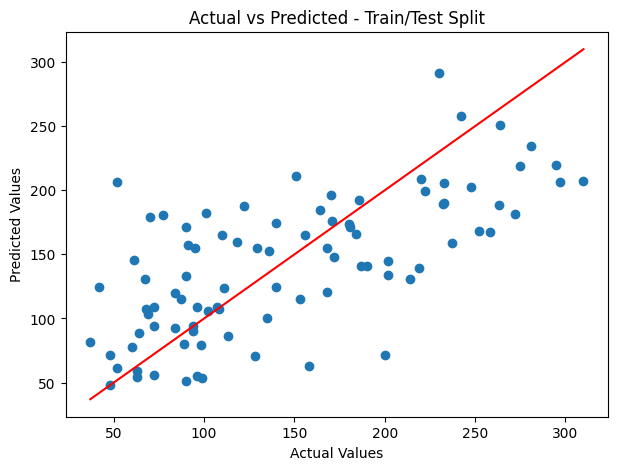

In [11]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Train/Test Split")
plt.show()